In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [28]:
import sys
sys.path.insert(0, '/home/u0106869/vfonsecad/kul_phd/github_projects/transfertools/')

# Generate some data

In [21]:
def sample_from_GMM(means, covariances, sizes):
    X = []
    for i, s in enumerate(sizes):
        X_sample = np.random.multivariate_normal(means[i], covariances[i], s)
        X.append(X_sample)
    return np.concatenate(X)

In [22]:
# source and target domains
Xs1 = sample_from_GMM({0: [-1, -1], 1: [4, 4], 2: [-6, 8]}, {0: np.eye(2), 1: np.eye(2), 2: np.eye(2) + 2}, [400, 300, 300])
Xt1 = sample_from_GMM({0: [-3, -1], 1: [6, 7], 2: [-6, 8]}, {0: np.eye(2)+0.5, 1: np.eye(2), 2: [[1, -0.5], [-0.5, 1]]}, [400, 300, 300])

Ys1 = Xt1.dot(np.array([0.1, -2])) + np.random.rand(Xt1.shape[0])

Xs2 = sample_from_GMM({0: [0, 0], 1: [0, 8]}, {0: [[1, 0.9], [0.9, 1]], 1: [[1.5, 0.25], [0.25, 1.5]]}, [400, 300])
Xt2 = sample_from_GMM({0: [2, 0], 1: [-6, 7]}, {0: [[1, -0.5], [-0.5, 1]], 1: [[1.2, 0.75], [0.75, 1.2]]}, [400, 300])

# Transfer algorithms

In [23]:
def plot_transfer(Xs1, Xt1, Xs1_trans, Xt1_trans, Xs2, Xt2, Xs2_trans, Xt2_trans):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes_f = axes.flatten()
    
    s_color = '#ed7811'
    t_color = '#0772b0'
    
    # plot first
    axes[0, 0].scatter(Xs1[:, 0], Xs1[:, 1], label='source', c=s_color, edgecolors='black')
    axes[0, 0].scatter(Xt1[:, 0], Xt1[:, 1], label='target', c=t_color, edgecolors='black')
    axes[0, 0].set_title('Before transfer')
    axes[0, 1].scatter(Xt1_trans[:, 0], Xt1_trans[:, 1], label='target', c=t_color, edgecolors='black')
    if len(Xs1_trans) > 0:
        axes[0, 1].scatter(Xs1_trans[:, 0], Xs1_trans[:, 1], label='source', c=s_color, edgecolors='black')
    axes[0, 1].set_title('After transfer')
    
    # plot second
    axes[1, 0].scatter(Xs2[:, 0], Xs2[:, 1], label='source', c=s_color, edgecolors='black')
    axes[1, 0].scatter(Xt2[:, 0], Xt2[:, 1], label='target', c=t_color, edgecolors='black')
    axes[1, 0].set_title('Before transfer')
    axes[1, 1].scatter(Xt2_trans[:, 0], Xt2_trans[:, 1], label='target', c=t_color, edgecolors='black')
    if len(Xs2_trans) > 0:
        axes[1, 1].scatter(Xs2_trans[:, 0], Xs2_trans[:, 1], label='source', c=s_color, edgecolors='black')
    axes[1, 1].set_title('After transfer')
    
    # clean up
    for i in range(len(axes_f)):
        axes_f[i].grid(alpha=0.4)
        axes_f[i].legend()
        
    plt.show()

## SSTCA

In [29]:
# from models import SSTCA
import models.SSTCA

transfor = SSTCA(mu=0.5, kernel_type='rbf', scaling='mean_center',n_components=15, geo_sigma2 = 10, knn = 5, lambda_ = 0.01)
Xs1_trans, Xt1_trans = transfor.fit_transfer(Xs1, Xt1, Ys1)

ValueError: attempted relative import beyond top-level package

## LocIT

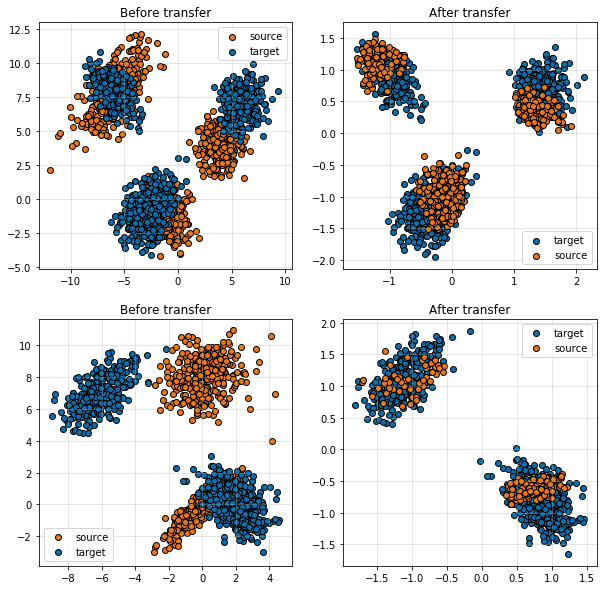

In [6]:
from transfertools.models import LocIT

# transfer with CORAL
transfor = LocIT(psi=10, train_selection='random', scaling='standard')
Xs1_trans, Xt1_trans = transfor.fit_transfer(Xs1, Xt1)
transfor = LocIT(psi=10, train_selection='random', scaling='standard')
Xs2_trans, Xt2_trans = transfor.fit_transfer(Xs2, Xt2)
del transfor

# plot sources and targets
plot_transfer(Xs1, Xt1, Xs1_trans, Xt1_trans, Xs2, Xt2, Xs2_trans, Xt2_trans)

## CORAL

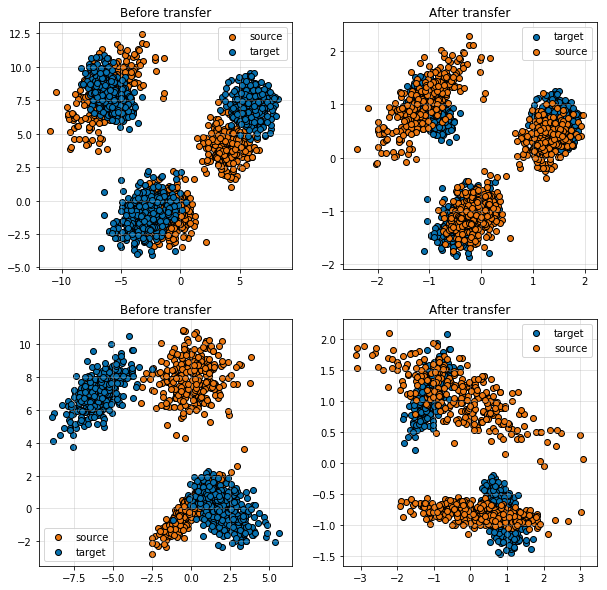

In [7]:
from transfertools.models import CORAL

# transfer with CORAL
transfor = CORAL(scaling='standard')
Xs1_trans, Xt1_trans = transfor.fit_transfer(Xs1, Xt1)
transfor = CORAL(scaling='standard')
Xs2_trans, Xt2_trans = transfor.fit_transfer(Xs2, Xt2)
del transfor

# plot sources and targets
plot_transfer(Xs1, Xt1, Xs1_trans, Xt1_trans, Xs2, Xt2, Xs2_trans, Xt2_trans)

## TCA

Adding regularization: 1e-06


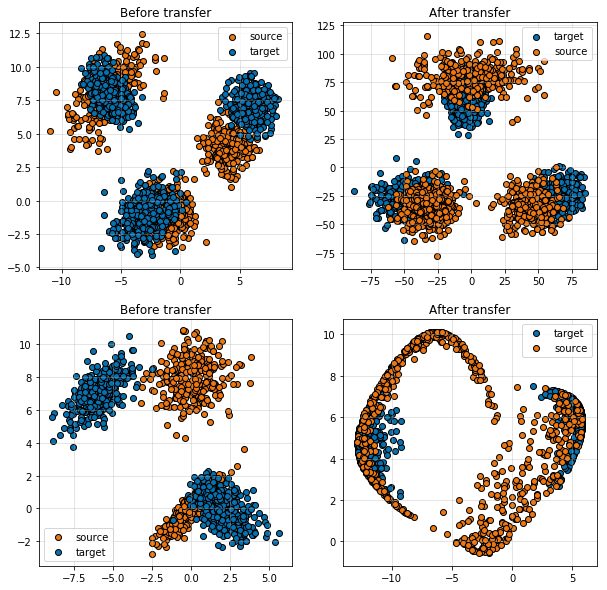

In [8]:
from transfertools.models import TCA

# transfer with CORAL
transfor = TCA(mu=0.1, kernel_type='linear', scaling='standard')
Xs1_trans, Xt1_trans = transfor.fit_transfer(Xs1, Xt1)
transfor = TCA(mu=0.1, kernel_type='rbf', scaling='standard')
Xs2_trans, Xt2_trans = transfor.fit_transfer(Xs2, Xt2)
del transfor

# plot sources and targets
plot_transfer(Xs1, Xt1, Xs1_trans, Xt1_trans, Xs2, Xt2, Xs2_trans, Xt2_trans)

## CBIT

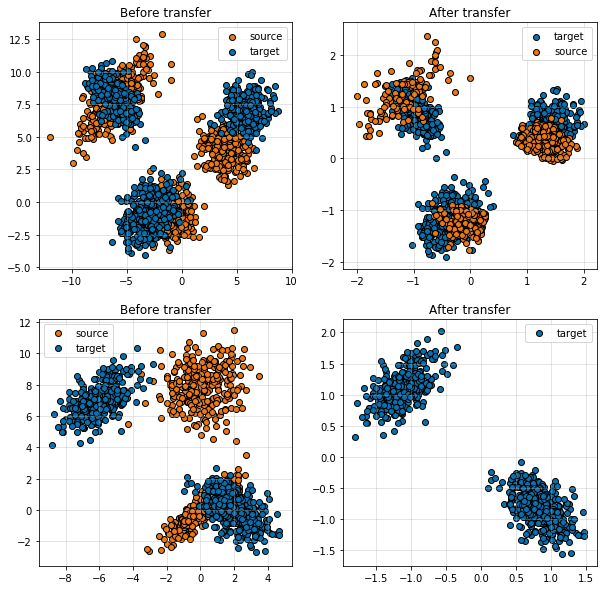

In [15]:
from transfertools.models import CBIT

ys1 = np.ones(len(Xs1), dtype=int) * -1
ys1[-100:] = 1
yt1 = np.ones(len(Xt1), dtype=int) * -1
yt1[-100:] = 1

# transfer with CORAL
transfor = CBIT(n_clusters=20, beta=1.5)
Xs1_trans, Xt1_trans = transfor.fit_transfer(Xs1, Xt1, ys1, yt1)
transfor = CBIT()
Xs2_trans, Xt2_trans = transfor.fit_transfer(Xs2, Xt2)
del transfor

# plot sources and targets
plot_transfer(Xs1, Xt1, Xs1_trans, Xt1_trans, Xs2, Xt2, Xs2_trans, Xt2_trans)